In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [22]:
# importing modules from scripts 
from script.pre_process import *

In [3]:
# Load the dataset
df = pd.read_csv('../data/telegram_data.csv')

In [4]:
df.head()

,Channel Title,Channel Username,ID,Message,Date,Media Path
0,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14845,ክቡራን ደምበኞቻችን እሁድ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከ...,2024-09-28 17:48:50+00:00,photos\@sinayelj_14845.jpg
1,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14844,ክቡራን ደምበኞቻችን ዛሬ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ሙሉ...,2024-09-27 08:02:52+00:00,photos\@sinayelj_14844.jpg
2,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14843,ለመላው የክርስትና እምነት ተከታዮች በሙሉ እንኳን ለመስቀል ደመራ በዓል ...,2024-09-27 07:38:57+00:00,photos\@sinayelj_14843.jpg
3,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14841,NaN,2024-09-26 12:24:51+00:00,photos\@sinayelj_14841.jpg
4,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14840,NaN,2024-09-26 12:24:51+00:00,photos\@sinayelj_14840.jpg


In [5]:
df.tail()

,Channel Title,Channel Username,ID,Message,Date,Media Path
221,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14598,Londony brand kids t shirt made in turkey 100%...,2024-08-13 13:55:25+00:00,photos\@sinayelj_14598.jpg
222,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14597,2 ፓርቲሽን ያለው የውሃ የጁስ የወተት የተለያዩ ፈሳሽ ነገሮች መጠጫ 1...,2024-08-13 13:52:21+00:00,photos\@sinayelj_14597.jpg
223,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14595,High quality kids lunch box with water bottle\...,2024-08-13 13:49:46+00:00,photos\@sinayelj_14595.jpg
224,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14594,NaN,2024-08-13 13:49:05+00:00,photos\@sinayelj_14594.jpg
225,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14593,NaN,2024-08-13 13:49:05+00:00,photos\@sinayelj_14593.jpg


In [6]:
# check for missing values
df.isnull().sum()

Channel Title         0
Channel Username      0
ID                    0
Message             170
Date                  0
Media Path            8
dtype: int64

In [7]:
df = df.dropna(subset=['Message'])

In [8]:
df.head()

,Channel Title,Channel Username,ID,Message,Date,Media Path
0,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14845,ክቡራን ደምበኞቻችን እሁድ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከ...,2024-09-28 17:48:50+00:00,photos\@sinayelj_14845.jpg
1,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14844,ክቡራን ደምበኞቻችን ዛሬ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ሙሉ...,2024-09-27 08:02:52+00:00,photos\@sinayelj_14844.jpg
2,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14843,ለመላው የክርስትና እምነት ተከታዮች በሙሉ እንኳን ለመስቀል ደመራ በዓል ...,2024-09-27 07:38:57+00:00,photos\@sinayelj_14843.jpg
5,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14839,ለኮንዶሚኒየም ለጠባብ ቤቶች ገላግሌ የሆነ ከንፁህ የሲልከን ጥሬ እቃ የተ...,2024-09-26 12:24:51+00:00,photos\@sinayelj_14839.jpg
9,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14835,Baby romper ከላዩ ፈር ውስጡ ኮተን የሆነ\n\n2000 birr\...,2024-09-26 12:24:11+00:00,photos\@sinayelj_14835.jpg


In [9]:
df.isnull().sum()

Channel Title       0
Channel Username    0
ID                  0
Message             0
Date                0
Media Path          3
dtype: int64

In [15]:
Message_df = df['Message']
Message_df

0      ክቡራን ደምበኞቻችን እሁድ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከ...
1      ክቡራን ደምበኞቻችን ዛሬ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ሙሉ...
2      ለመላው የክርስትና እምነት ተከታዮች በሙሉ እንኳን ለመስቀል ደመራ በዓል ...
5      ለኮንዶሚኒየም ለጠባብ ቤቶች ገላግሌ የሆነ ከንፁህ የሲልከን ጥሬ እቃ የተ...
9      Baby romper   ከላዩ ፈር ውስጡ ኮተን የሆነ\n\n2000 birr\...
12     Chicco 5 in 1 mama bag\nኦሪጅናል ማቴሪያል\nበሳይዙ ትልቅ\...
19     aiebao HIP SEAT CARRIER\nምቹ ጠንካራ የልጆች ማዘያ\nበተለ...
29     Kids mat  \n\n💥4100 ብር\n\nSize 1.80*2m\n\nfree...
34     Wearable breast milk collector\n\nWearable bre...
35     ክቡራን ደምበኞቻችን እሁድ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከ...
39     Double layer lunch box \nwith dipping jar \n\n...
42     50 pcs balls \n\n1700 birr \n\n0909003864\n090...
46     Infantino baby carier\nባለ ኮፉያ ምቹ ማዘያ\nበ 3 አቅጣጫ...
55     Mastela deluxe multi-functional bassinet\nአልቋል...
57     ክቡራን ደምበኞቻችን እሁድ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከ...
64     👌world's number one high-quality multifunction...
65     ክቡራን ደምበኞቻችን ነገ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከጠ...
66     ውድ የሲና ኪድስ ቤተሰቦች እንኳን ለ2

In [17]:
import re

def remove_emojis(text):
        """Removes all emojis from text."""
        emoji_pattern = re.compile(
            "[" 
            "\U0001F600-\U0001F64F" 
            "\U0001F300-\U0001F5FF" 
            "\U0001F680-\U0001F6FF"  
            "\U0001F700-\U0001F77F"  
            "\U0001F1E0-\U0001F1FF"   
            "\U00002500-\U00002BEF"  
            "\U00002702-\U000027B0"  
            "\U0001F900-\U0001F9FF"  
            "\U00002600-\U000026FF"  
             "\u0031\uFE0F\u20E3"     
            "]+", 
            flags=re.UNICODE
        )
        return emoji_pattern.sub(r'', text)


df['Message'] = df['Message'].apply(remove_emojis)
#display the updated df
print(df.head())


       Channel Title Channel Username     ID  \
0  SINA KIDS/ሲና ኪድስⓇ        @sinayelj  14845   
1  SINA KIDS/ሲና ኪድስⓇ        @sinayelj  14844   
2  SINA KIDS/ሲና ኪድስⓇ        @sinayelj  14843   
5  SINA KIDS/ሲና ኪድስⓇ        @sinayelj  14839   
9  SINA KIDS/ሲና ኪድስⓇ        @sinayelj  14835   

                                             Message  \
0  ክቡራን ደምበኞቻችን እሁድ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከ...   
1  ክቡራን ደምበኞቻችን ዛሬ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ሙሉ...   
2  ለመላው የክርስትና እምነት ተከታዮች በሙሉ እንኳን ለመስቀል ደመራ በዓል ...   
5  ለኮንዶሚኒየም ለጠባብ ቤቶች ገላግሌ የሆነ ከንፁህ የሲልከን ጥሬ እቃ የተ...   
9  Baby romper   ከላዩ ፈር ውስጡ ኮተን የሆነ\n\n2000 birr\...   

                        Date                  Media Path  
0  2024-09-28 17:48:50+00:00  photos\@sinayelj_14845.jpg  
1  2024-09-27 08:02:52+00:00  photos\@sinayelj_14844.jpg  
2  2024-09-27 07:38:57+00:00  photos\@sinayelj_14843.jpg  
5  2024-09-26 12:24:51+00:00  photos\@sinayelj_14839.jpg  
9  2024-09-26 12:24:11+00:00  photos\@sinayelj_14835.jpg  


In [19]:
df.to_csv('../data/clean_data.csv')

In [22]:
clean_df = pd.read_csv('../data/clean_data.csv')
clean_df

,Unnamed: 0,Channel Title,Channel Username,ID,Message,Date,Media Path
0,0,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14845,ክቡራን ደምበኞቻችን እሁድ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከ...,2024-09-28 17:48:50+00:00,photos\@sinayelj_14845.jpg
1,1,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14844,ክቡራን ደምበኞቻችን ዛሬ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ሙሉ...,2024-09-27 08:02:52+00:00,photos\@sinayelj_14844.jpg
2,2,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14843,ለመላው የክርስትና እምነት ተከታዮች በሙሉ እንኳን ለመስቀል ደመራ በዓል ...,2024-09-27 07:38:57+00:00,photos\@sinayelj_14843.jpg
3,5,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14839,ለኮንዶሚኒየም ለጠባብ ቤቶች ገላግሌ የሆነ ከንፁህ የሲልከን ጥሬ እቃ የተ...,2024-09-26 12:24:51+00:00,photos\@sinayelj_14839.jpg
4,9,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14835,Baby romper ከላዩ ፈር ውስጡ ኮተን የሆነ\n\n2000 birr\...,2024-09-26 12:24:11+00:00,photos\@sinayelj_14835.jpg
5,12,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14832,Chicco 5 in mama bag\nኦሪጅናል ማቴሪያል\nበሳይዙ ትልቅ\n...,2024-09-26 12:20:22+00:00,photos\@sinayelj_14832.jpg
6,19,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14825,aiebao HIP SEAT CARRIER\nምቹ ጠንካራ የልጆች ማዘያ\nበተለ...,2024-09-26 12:19:20+00:00,photos\@sinayelj_14825.jpg
7,29,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14815,Kids mat \n\n400 ብር\n\nSize .80*2m\n\nfree de...,2024-09-25 06:15:53+00:00,photos\@sinayelj_14815.jpg
8,34,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14810,Wearable breast milk collector\n\nWearable bre...,2024-09-24 07:10:40+00:00,photos\@sinayelj_14810.jpg
9,35,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14809,ክቡራን ደምበኞቻችን እሁድ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከ...,2024-09-22 08:05:04+00:00,photos\@sinayelj_14809.jpg


In [36]:
df.shape

(56, 6)

In [40]:
def label_message(message):
        """Labels messages with prices, locations, and kids products using a rule-based approach."""
        # Define multi-word entities (locations, products, etc.)
        multi_word_entities = {
            'ብስራተ ገብርኤል': 'I-LOC',
        }
        price = ['ብር', 'ETB', '$', 'Birr'],
        location = ['ገርጂ', '4ኪሎ', 'ብስራተ ገብርኤል'],
        kinds = ['toy', 'children', 'kids', 'መጫወቻ', 'play', 'games', 'fun', 'educational', 
                'puzzle', 'doll', 'action figure', 'stuffed animal', 'arts and crafts', 
                'books', 'outdoor toys', 'building blocks', 'baby', 'toddler', 'Baby', 
                'መጫወቻዎች']

        # First, check for multi-word entities in the message
        for entity, label in multi_word_entities.items():
            if entity in message:
                message = message.replace(entity, f"{entity.replace(' ', '_')}")  # Replace spaces with underscores

        tokens = re.findall(r'\S+', message)  # Tokenize after replacing multi-word entities
        labeled_tokens = []

        for token in tokens:
            if token.startswith('@'):
                continue  # Skip usernames

            # After tokenizing, replace underscores with spaces again for multi-word entities
            token = token.replace('_', ' ')

            # Check if token is a multi-word entity (location, product, etc.)
            if token in multi_word_entities:
                labeled_tokens.append(f"{token} {multi_word_entities[token]}")
            # Check if token is a location (single-word locations)
            elif any(loc in token for loc in ['ገርጂ', '4ኪሎ']):
                labeled_tokens.append(f"{token} I-LOC")
            # Check if token is a phone number (exclude numbers longer than 9 digits)
            elif re.match(r'^\+?\d{10,15}$', token):
                labeled_tokens.append(f"{token} O")
            # Check if token is a price (e.g., 500 ETB, $100, or ብር)
            elif re.match(r'^\d+(\.\d{1,2})?$', token) and len(token) < 9:
                labeled_tokens.append(f"{token} I-PRICE")
            elif 'ብር' in token or 'Birr' in token or 'ETB' in token:
                labeled_tokens.append(f"{token} I-PRICE")
            # Check if token matches kids products category
            elif any(token.lower() == item.lower() for item in kinds):
                labeled_tokens.append(f"{token} B-PRODUCT")
            # Otherwise, treat it as outside any entity
            else:
                labeled_tokens.append(f"{token} O")

        return "\n".join(labeled_tokens)
df['Labeled_Message'] = df['Message'].apply(label_message)
print(df['Labeled_Message'])


0      ክቡራን O\nደምበኞቻችን O\nእሁድ O\nገርጂ I-LOC\nእና O\nብስራ...
1      ክቡራን O\nደምበኞቻችን O\nዛሬ O\nገርጂ I-LOC\nእና O\nብስራተ...
2      ለመላው O\nየክርስትና O\nእምነት O\nተከታዮች O\nበሙሉ O\nእንኳን...
5      ለኮንዶሚኒየም O\nለጠባብ O\nቤቶች O\nገላግሌ O\nየሆነ O\nከንፁህ...
9      Baby B-PRODUCT\nromper O\nከላዩ O\nፈር O\nውስጡ O\n...
12     Chicco O\n5 I-PRICE\nin O\nmama O\nbag O\nኦሪጅና...
19     aiebao O\nHIP O\nSEAT O\nCARRIER O\nምቹ O\nጠንካራ...
29     Kids B-PRODUCT\nmat O\n400 I-PRICE\nብር I-PRICE...
34     Wearable O\nbreast O\nmilk O\ncollector O\nWea...
35     ክቡራን O\nደምበኞቻችን O\nእሁድ O\nገርጂ I-LOC\nእና O\nብስራ...
39     Double O\nlayer O\nlunch O\nbox O\nwith O\ndip...
42     50 I-PRICE\npcs O\nballs O\n700 I-PRICE\nbirr ...
46     Infantino O\nbaby B-PRODUCT\ncarier O\nባለ O\nኮ...
55     Mastela O\ndeluxe O\nmulti-functional O\nbassi...
57     ክቡራን O\nደምበኞቻችን O\nእሁድ O\nገርጂ I-LOC\nእና O\nብስራ...
64     world's O\nnumber O\none O\nhigh-quality O\nmu...
65     ክቡራን O\nደምበኞቻችን O\nነገ O\nገርጂ I-LOC\nእና O\nብስራተ...
66     ውድ O\nየሲና O\nኪድስ O\nቤተሰቦ

In [42]:
df['Labeled_Message'] = df['Message'].apply(label_message)
labeled_data_path = '../data/labeled_telegram_data.txt'
with open(labeled_data_path, 'w', encoding='utf-8') as f:
    for _, row in df.iterrows():
        f.write(f"{row['Labeled_Message']}\n\n")
print(f"Labeled data saved to {labeled_data_path}")

Labeled data saved to ../data/labeled_telegram_data.txt


In [15]:
# Preprocess the dataset
preprocessed_data = preprocess_dataset(df.to_dict('records'))

NameError: name 'preprocess_dataset' is not defined

In [12]:
# Convert preprocessed data back to a DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data)

In [29]:
# Basic statistics
print("Total number of messages:", len(clean_df))
print("Number of unique channels:", clean_df['Channel Username'].nunique())

Total number of messages: 56
Number of unique channels: 1


In [15]:
# Token analysis
all_tokens = [token for tokens in preprocessed_df['tokens'] for token in tokens]
token_counts = Counter(all_tokens)

In [16]:
print("Total number of tokens:", len(all_tokens))
print("Number of unique tokens:", len(token_counts))

Total number of tokens: 81785
Number of unique tokens: 5103


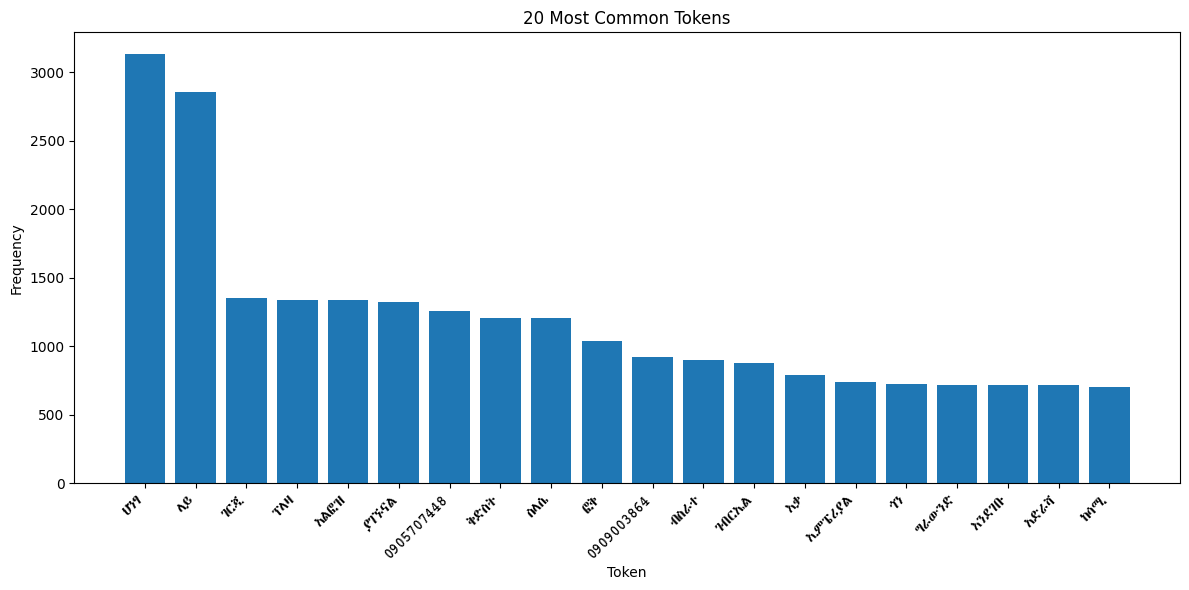

In [23]:
from matplotlib import font_manager
font='./washrab.ttf'
property = font_manager.FontProperties(fname=font)
plt.figure(figsize=(12, 6))
plt.bar(*zip(*token_counts.most_common(20)))
plt.title('20 Most Common Tokens')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontproperties=property)
plt.tight_layout()
plt.show()

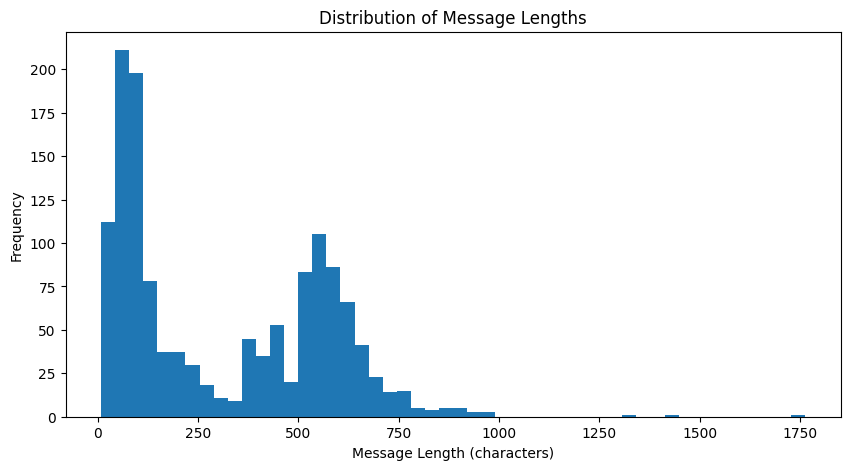

In [24]:
# Message length analysis
preprocessed_df['message_length'] = preprocessed_df['cleaned_message'].str.len()

plt.figure(figsize=(10, 5))
plt.hist(preprocessed_df['message_length'], bins=50)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length (characters)')
plt.ylabel('Frequency')
plt.show()


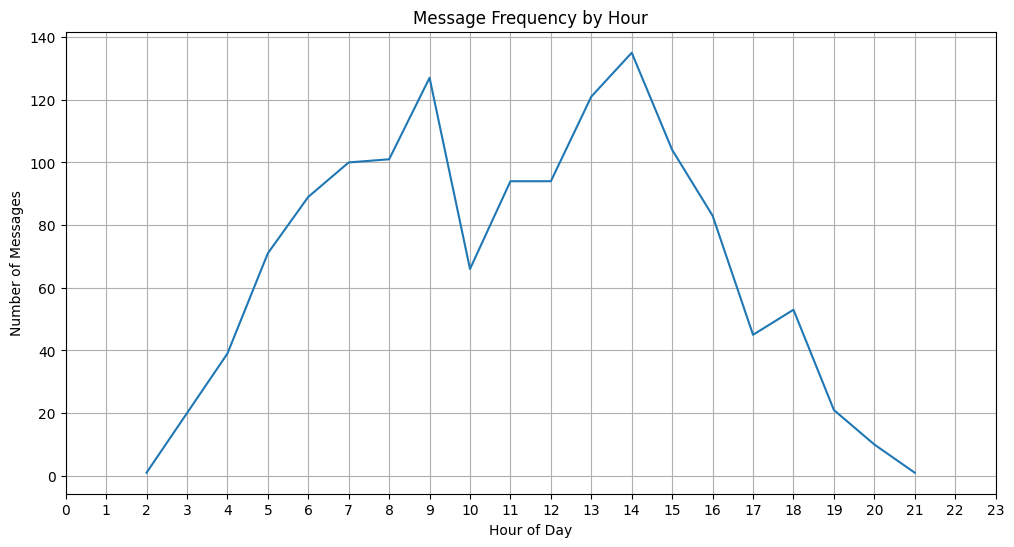

In [25]:
# Time analysis
preprocessed_df['Date'] = pd.to_datetime(preprocessed_df['Date'])
preprocessed_df['hour'] = preprocessed_df['Date'].dt.hour

hourly_counts = preprocessed_df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_counts.index, hourly_counts.values)
plt.title('Message Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Messages')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

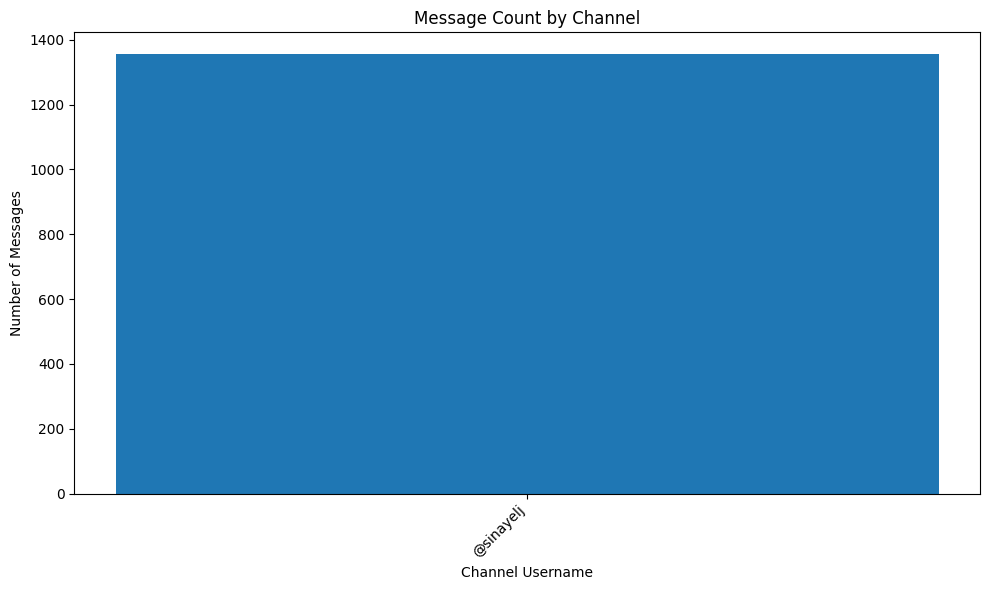

In [26]:
# Channel analysis
channel_counts = preprocessed_df['Channel_Username'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(channel_counts.index, channel_counts.values)
plt.title('Message Count by Channel')
plt.xlabel('Channel Username')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

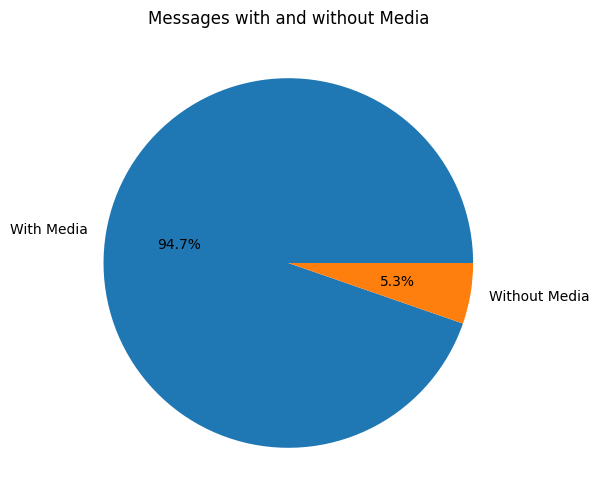

In [27]:
# Media analysis
media_counts = preprocessed_df['Media_Path'].notna().value_counts()
plt.figure(figsize=(8, 6))
plt.pie(media_counts, labels=['With Media', 'Without Media'], autopct='%1.1f%%')
plt.title('Messages with and without Media')
plt.show()